In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
sns.set_style('whitegrid')

In [3]:
input_path='./input/'

In [6]:
train_data=pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data=pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_data['Deck']=train_data['Cabin'].astype(str).str[0].str.upper()
test_data['Deck']=test_data['Cabin'].astype(str).str[0].str.upper()


In [10]:
train_data['Deck']=train_data['Cabin'].replace('N',np.nan)
test_data['Deck']=test_data['Cabin'].replace('N',np.nan)


In [12]:
train_data['Deck']=train_data['Cabin'].replace('T',np.nan)
test_data['Deck']=test_data['Cabin'].replace('T',np.nan)

train_data['Deck'].value_counts()


G6             4
C23 C25 C27    4
B96 B98        4
F2             3
C22 C26        3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Deck, Length: 146, dtype: int64

In [13]:
def age_sex_classification(row):
    if row['Age']<=18:
        return 'child'
    else:
        return row['Sex']
train_data['who']=train_data.apply(age_sex_classification,axis=1)
test_data['who']=test_data.apply(age_sex_classification, axis=1)   

train_data['who'].value_counts() 

male      506
female    246
child     139
Name: who, dtype: int64

In [14]:
train_data['Alone']=(train_data['SibSp']==0)&(train_data['Parch']==0)
test_data['Alone']=(test_data['SibSp']==0)&(test_data['Parch']==0)
train_data['Alone'].value_counts()

True     537
False    354
Name: Alone, dtype: int64

In [15]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train_data.dropna().describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,456.000000,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,247.584731,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,459.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,678.000000,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [17]:
train_data.var()

C:\Users\ha&jun\AppData\Local\Temp\ipykernel_12040\1571859021.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.var()


PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
Alone              0.239723
dtype: float64

In [18]:
train_data.mad()

PassengerId    222.749719
Survived         0.473013
Pclass           0.761968
Age             11.322944
SibSp            0.713780
Parch            0.580742
Fare            28.163692
Alone            0.478908
dtype: float64

<AxesSubplot:>

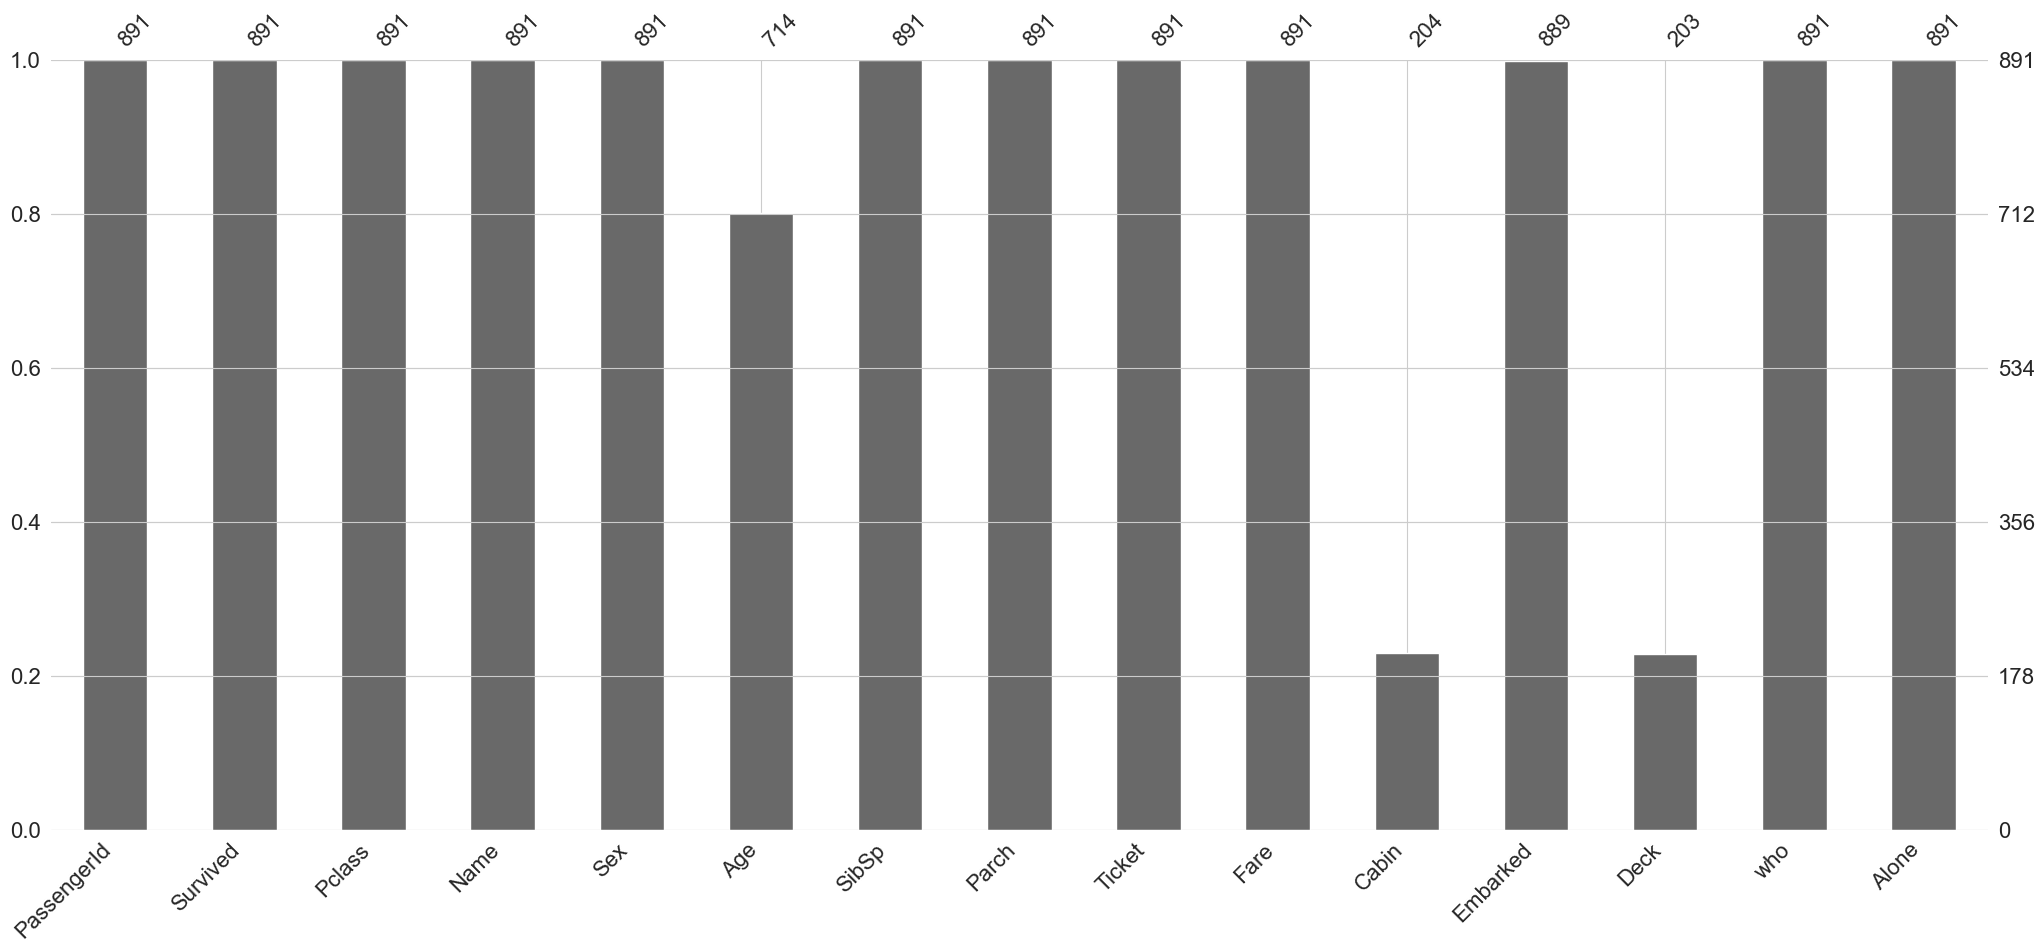

In [26]:
import missingno as msno
msno.bar(df=train_data)

#터미널 창에 모듈 설치 
#pip list | find "missingno"
#pip list | find "missingno"



<AxesSubplot:>

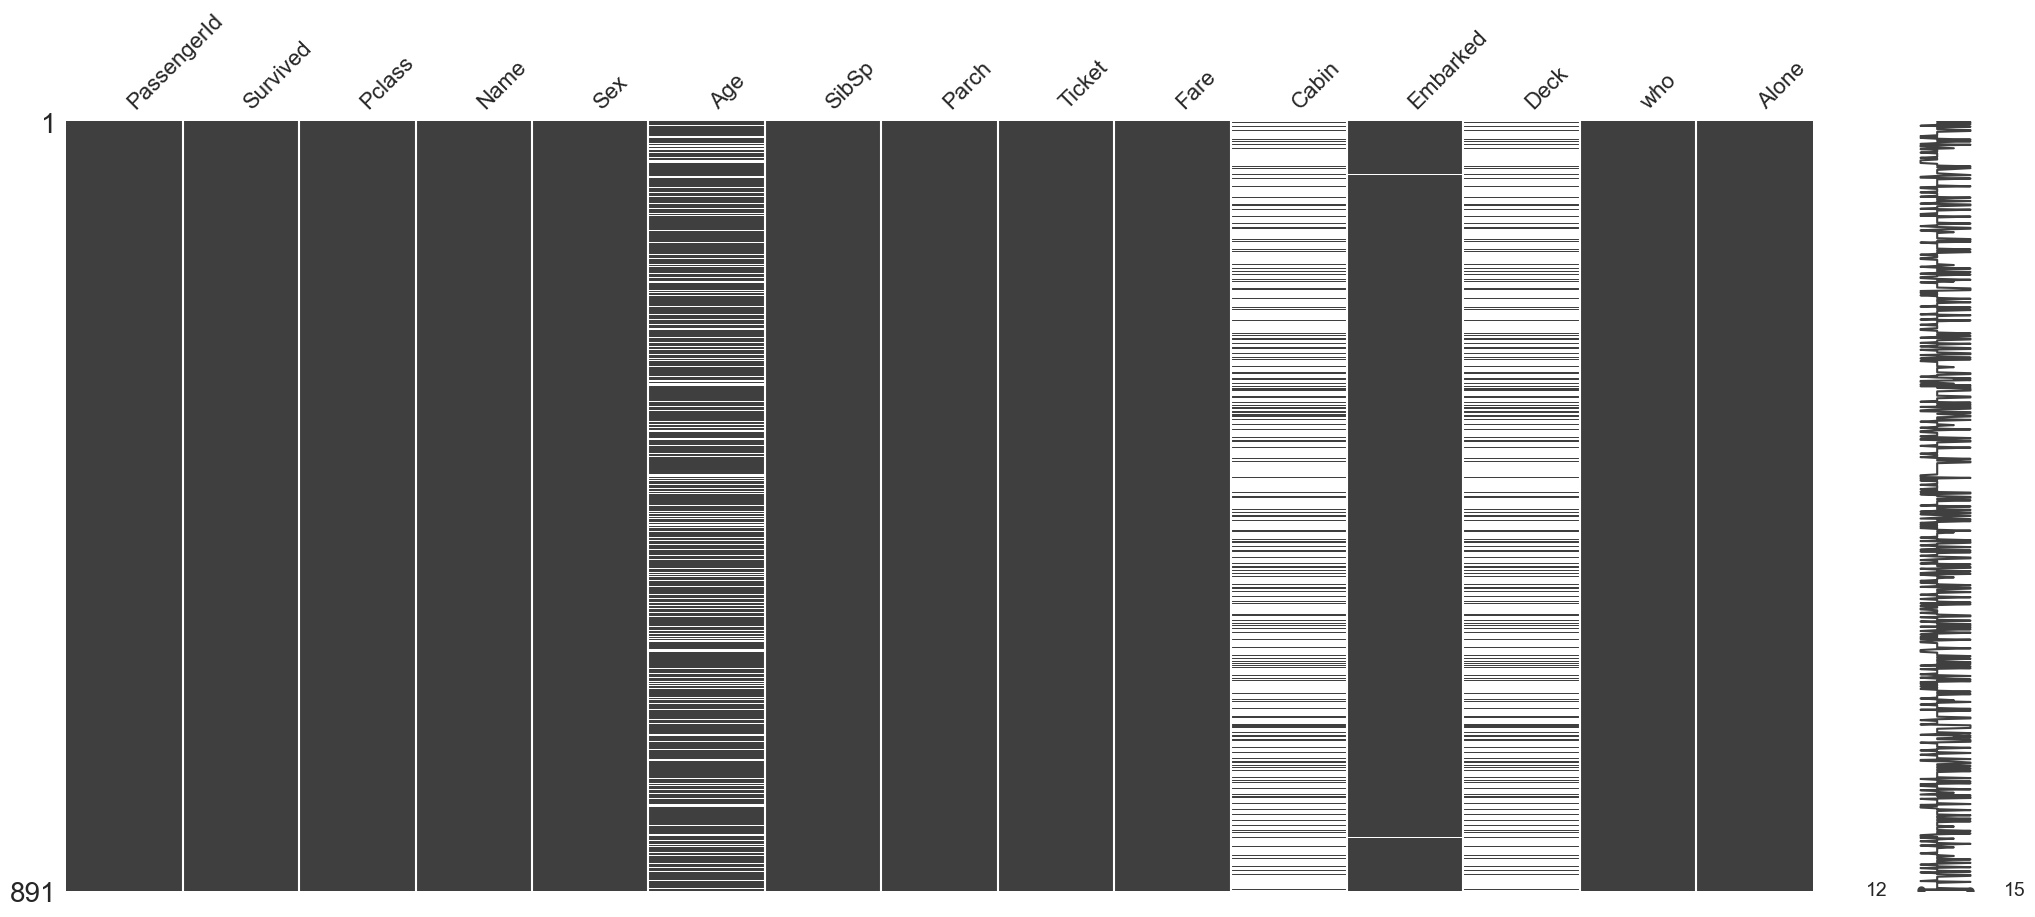

In [27]:
msno.matrix(df=train_data)

In [28]:
train_data.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,who,Alone
Pclass,,,,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214,175,216,216
2,184,184,184,184,173,184,184,184,184,16,184,16,184,184
3,491,491,491,491,355,491,491,491,491,12,491,12,491,491


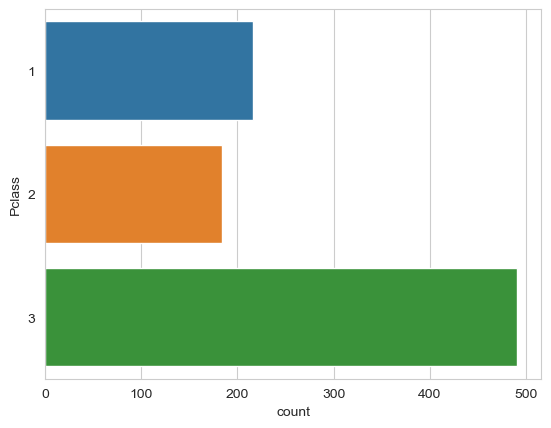

In [29]:
sns.countplot(y='Pclass',data=train_data);

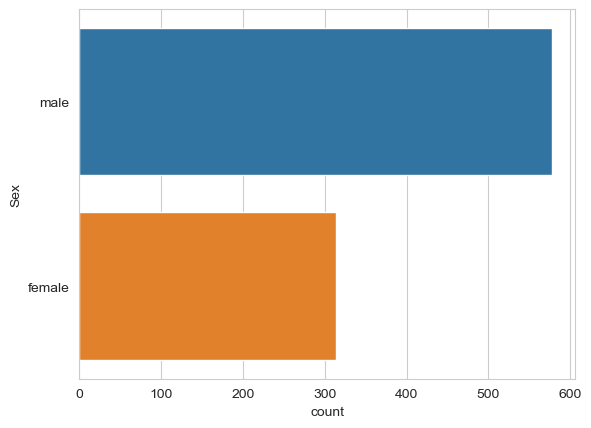

In [30]:
sns.countplot(y='Sex',data=train_data);

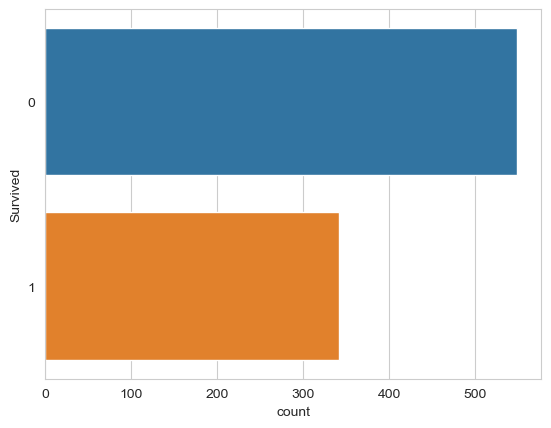

In [31]:
sns.countplot(y='Survived',data=train_data);

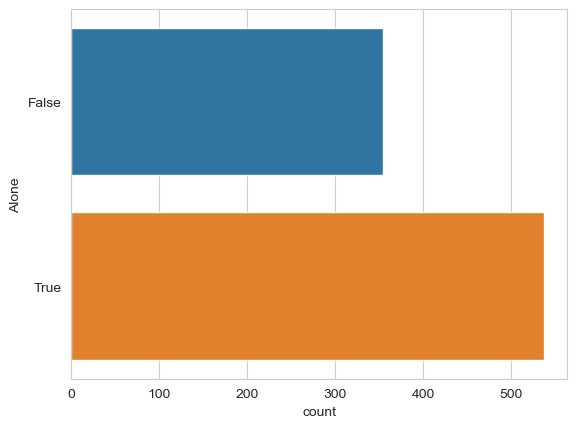

In [32]:
sns.countplot(y='Alone',data=train_data);

In [33]:
train_data.groupby('Pclass').std()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Alone
Pclass,,,,,,,
1,246.737616,0.484026,14.802856,0.611898,0.693997,78.380373,0.501140
2,250.852161,0.500623,14.001077,0.601633,0.690963,13.417399,0.497081
3,264.441453,0.428949,12.495398,1.374883,0.888861,11.778142,0.474233


In [34]:
train_data.groupby('Pclass')['Fare'].median()

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [35]:
train_data.query("Survived==1")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,who,Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,female,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,female,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,female,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN,female,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN,child,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,NaN,child,True
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,C50,female,False
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,NaN,female,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B42,female,True


In [36]:
train_data.query("Survived ==1").groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,who,Alone
Pclass,,,,,,,,,,,,,,
1,136,136,136,136,122,136,136,136,136,117,134,117,136,136
2,87,87,87,87,83,87,87,87,87,13,87,13,87,87
3,119,119,119,119,85,119,119,119,119,6,119,6,119,119


In [37]:
train_data.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [38]:
train_data.query("Survived==1").groupby('Pclass')['Age','Fare'].describe()

C:\Users\ha&jun\AppData\Local\Temp\ipykernel_12040\2395833611.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train_data.query("Survived==1").groupby('Pclass')['Age','Fare'].describe()


Age                                                        Fare  \
        count       mean        std   min    25%   50%   75%   max  count   
Pclass                                                                      
1       122.0  35.368197  13.760017  0.92  24.25  35.0  45.0  80.0  136.0   
2        83.0  25.901566  14.837787  0.67  17.50  28.0  34.0  62.0   87.0   
3        85.0  20.646118  11.995047  0.42  14.00  22.0  29.0  63.0  119.0   

                                                                                
             mean        std      min       25%      50%         75%       max  
Pclass                                                                          
1       95.608029  85.286820  25.9292  50.98545  77.9583  111.481225  512.3292  
2       22.055700  10.853502  10.5000  13.00000  21.0000   26.250000   65.0000  
3       13.694887  10.692993   0.0000   7.77500   8.5167   15.875000   56.4958

In [39]:
train_data.groupby('Sex')['Age'].aggregate([min, np.median, max])

,min,median,max
Sex,,,
female,0.75,27.0,63.0
male,0.42,29.0,80.0


In [40]:
train_data.query("Age>30").groupby('Pclass').median()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Alone
Pclass,,,,,,,
1,494.0,1.0,45.0,0.0,0.0,56.9292,0.0
2,451.0,0.0,39.0,0.0,0.0,14.0000,1.0
3,520.0,0.0,38.0,0.0,0.0,8.0500,1.0


In [41]:
train_data.query("Fare < 20").groupby('Pclass').median()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Alone
Pclass,,,,,,,
1,811.5,0.0,38.5,0.0,0.0,0.0000,1.0
2,416.0,0.0,30.0,0.0,0.0,13.0000,1.0
3,442.0,0.0,25.0,0.0,0.0,7.8958,1.0


In [42]:
train_data.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [43]:
train_data.groupby(['Pclass','Sex'])['Age'].mean().unstack()

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


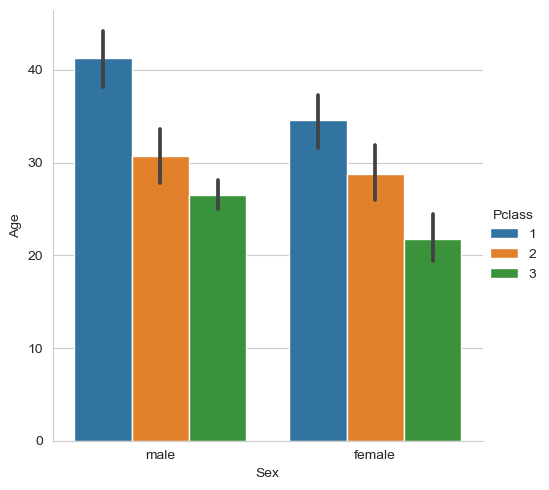

In [44]:
sns.catplot(x='Sex',y='Age',hue='Pclass',kind='bar',data=train_data);

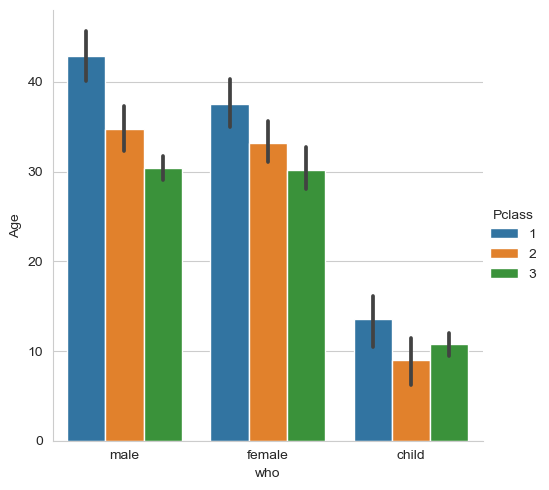

In [57]:
sns.catplot(x='who', y='Age',hue='Pclass',kind='bar',data=train_data);

In [58]:
train_data.groupby(['Pclass','Sex'])['Fare'].mean().unstack()

Sex,female,male
Pclass,,
1,106.125798,67.226127
2,21.970121,19.741782
3,16.118810,12.661633


In [60]:
train_data.groupby(['Pclass', 'Who'])['Fare'].mean().unstack()

KeyError: 'Who'

AttributeError: 'PathCollection' object has no property 'knd'

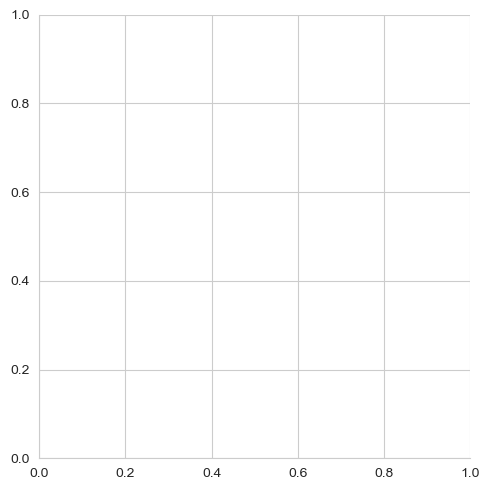

In [61]:
sns.catplot(x='Sex',y='Fare',hue='Pclass',knd='bar',data=train_data);

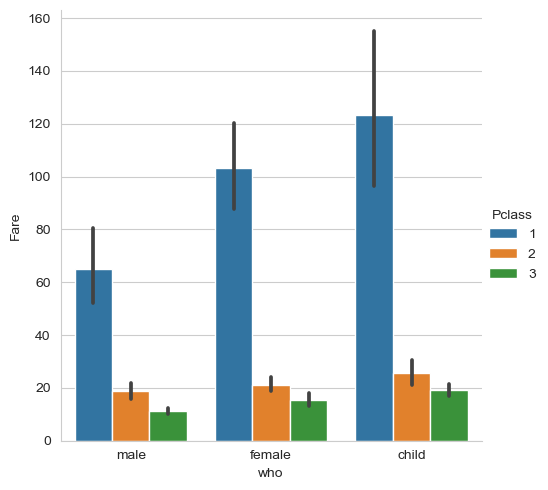

In [62]:
sns.catplot(x='who',y='Fare',hue='Pclass',kind='bar',data=train_data);

In [63]:
train_data.groupby(['Pclass','Sex'])['Survived'].mean().unstack()

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [65]:
train_data.pivot_table('Survived',index='Pclass',columns='Sex')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [66]:
train_data.pivot_table('Survived',index='Pclass',columns='who')

who,child,female,male
Pclass,,,
1,0.875000,0.975904,0.350427
2,0.793103,0.903226,0.086022
3,0.351064,0.495050,0.121622


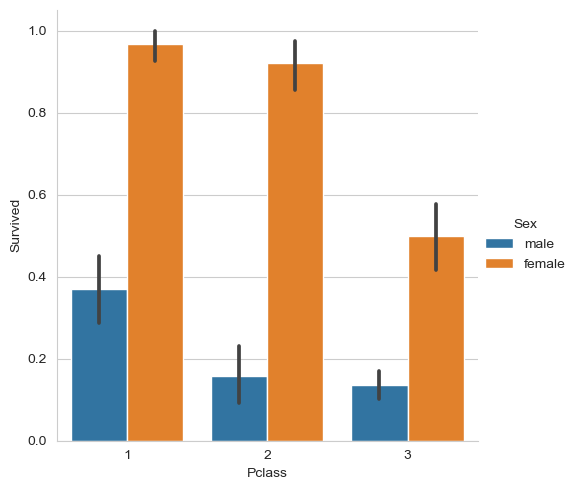

In [67]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',kind='bar',data=train_data);

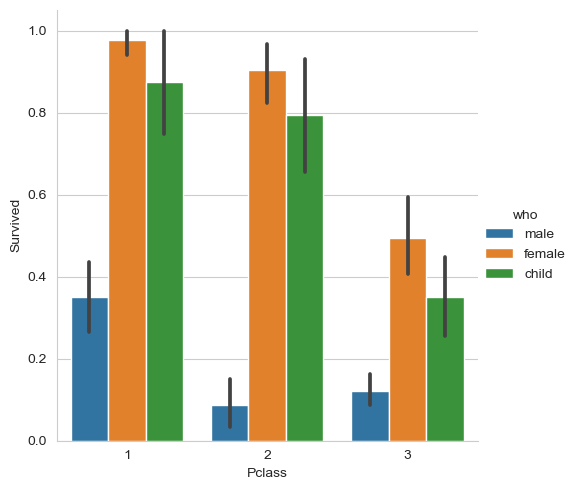

In [68]:
sns.catplot(x='Pclass',y='Survived',hue='who',kind='bar',data=train_data);

In [69]:
age_cut=pd.cut(train_data['Age'],[0,18,40,80])
train_data.pivot_table('Survived',['Sex',age_cut],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 40]  0.979167  0.914894  0.480000
       (40, 80]  0.961538  0.846154  0.111111
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 40]  0.478261  0.063492  0.146199
       (40, 80]  0.280000  0.095238  0.064516

In [70]:
age_cut=pd.cut(train_data['Age'],[0,18,40,80])
train_data.pivot_table('Survived',['who',age_cut],'Pclass')

Pclass                  1         2         3
who    Age                                   
child  (0, 18]   0.875000  0.793103  0.351064
female (18, 40]  0.979167  0.914894  0.480000
       (40, 80]  0.961538  0.846154  0.111111
male   (18, 40]  0.478261  0.063492  0.146199
       (40, 80]  0.280000  0.095238  0.064516

In [73]:
fare_cut=pd.qcut(train_data['Fare'],3)
train_data.pivot_table('Survived',['who',age_cut],[fare_cut,'Pclass'])

Fare            (-0.001, 8.662]           (8.662, 26.0]                      \
Pclass                        1         3             1         2         3   
who    Age                                                                    
child  (0, 18]              NaN  0.357143           NaN  0.705882  0.552632   
female (18, 40]             NaN  0.550000           NaN  0.894737  0.461538   
       (40, 80]             NaN  0.000000           1.0  0.818182  0.250000   
male   (18, 40]             0.0  0.138462           NaN  0.078431  0.114286   
       (40, 80]             NaN  0.074074           0.0  0.111111  0.000000   

Fare            (26.0, 512.329]                      
Pclass                        1         2         3  
who    Age                                           
child  (0, 18]         0.875000  0.916667  0.071429  
female (18, 40]        0.979167  1.000000  0.250000  
       (40, 80]        0.958333  1.000000  0.000000  
male   (18, 40]        0.523810  0.000000  0.500000  
       (40, 80]        0.291667  0.000000       NaN

In [75]:
train_data.pivot_table('Survived',index='who',columns='Pclass',margins=True)

Pclass,1,2,3,All
who,,,,
child,0.875000,0.793103,0.351064,0.503597
female,0.975904,0.903226,0.495050,0.760163
male,0.350427,0.086022,0.121622,0.167984
All,0.629630,0.472826,0.242363,0.383838


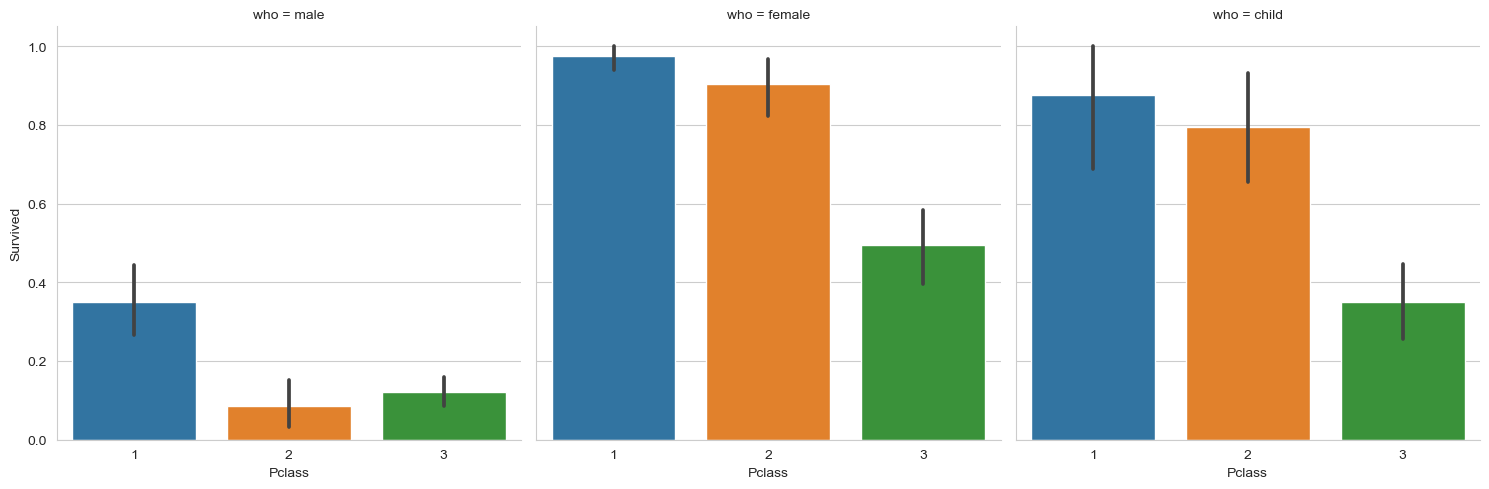

In [76]:
sns.catplot(x='Pclass',y='Survived',col='who',kind='bar',data=train_data);

In [78]:
train_data.pivot_table('Survived',index='Deck',columns='Pclass',margins=True)

Pclass,1,2,3,All
Deck,,,,
A10,0.000000,NaN,NaN,0.000000
A14,0.000000,NaN,NaN,0.000000
A16,1.000000,NaN,NaN,1.000000
A19,0.000000,NaN,NaN,0.000000
A20,1.000000,NaN,NaN,1.000000
...,...,...,...,...
F33,NaN,1.0000,NaN,1.000000
F38,NaN,NaN,0.0,0.000000
F4,NaN,1.0000,NaN,1.000000


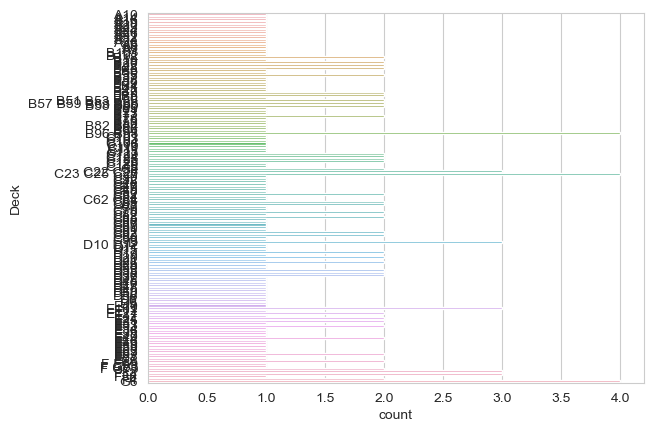

In [79]:
sorted_decks=sorted(train_data['Deck'].dropna().unique())
sns.countplot(y='Deck',data=train_data, order=sorted_decks);

<AxesSubplot:xlabel='count', ylabel='Deck'>

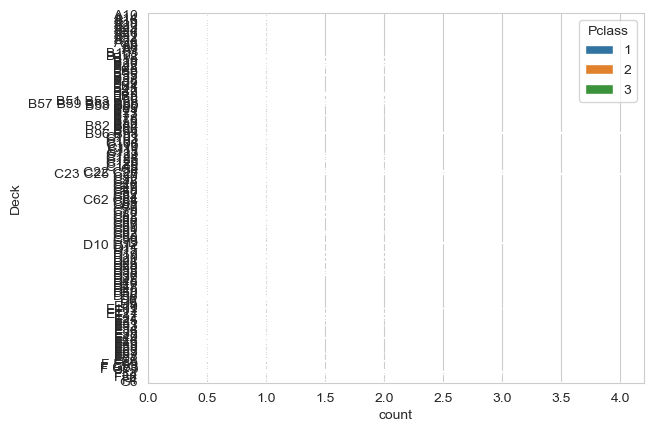

In [81]:
sns.countplot(y='Deck',hue='Pclass',data=train_data, order=sorted_decks)

AttributeError: 'Rectangle' object has no property 'hum'

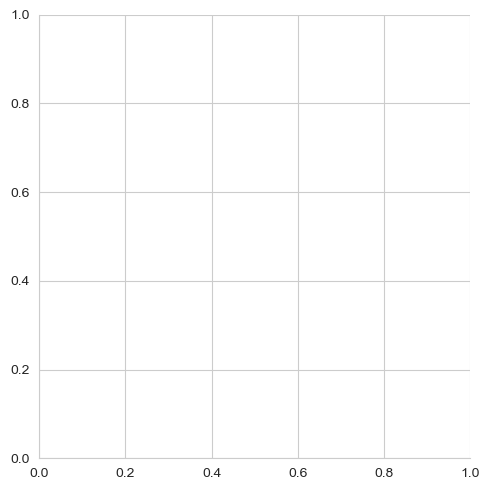

In [82]:
sns.catplot(x='Survived',y='Deck',hum='Pclass',kind='bar',data=train_data, order=sorted_decks);

In [84]:
train_data.pivot_table('Survived',index='Embarked',columns='Pclass',margins=True)

Pclass,1,2,3,All
Embarked,,,,
C,0.694118,0.529412,0.378788,0.553571
Q,0.500000,0.666667,0.375000,0.389610
S,0.582677,0.463415,0.189802,0.336957
All,0.626168,0.472826,0.242363,0.382452


<AxesSubplot:xlabel='count', ylabel='Embarked'>

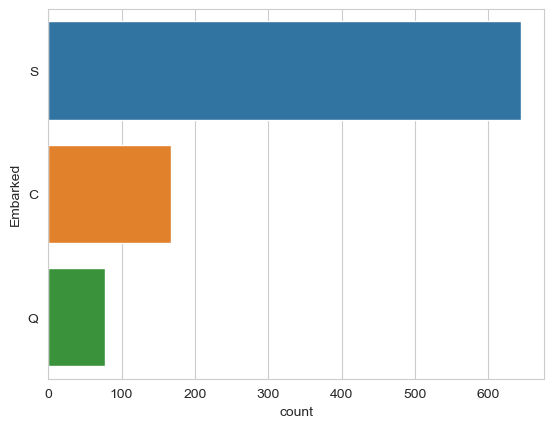

In [85]:
sns.countplot(y='Embarked',data=train_data)

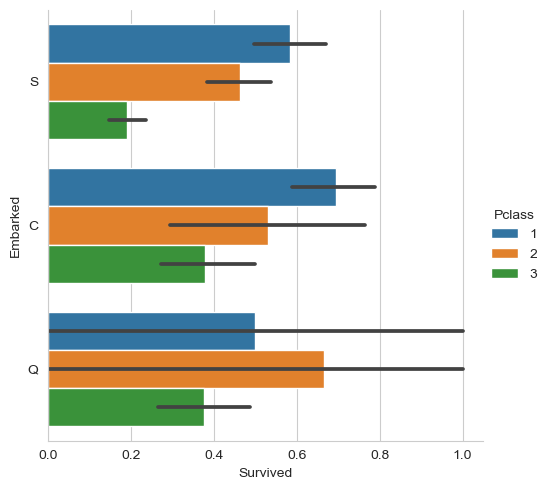

In [86]:
sns.catplot(x='Survived',y='Embarked',hue='Pclass',kind='bar',data=train_data);

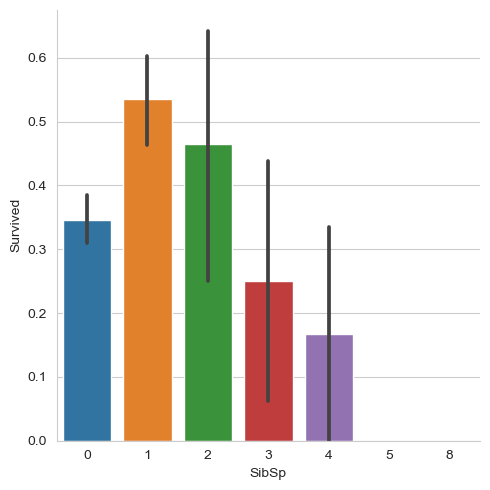

In [87]:
sns.catplot(x='SibSp',y='Survived',kind='bar',data=train_data);

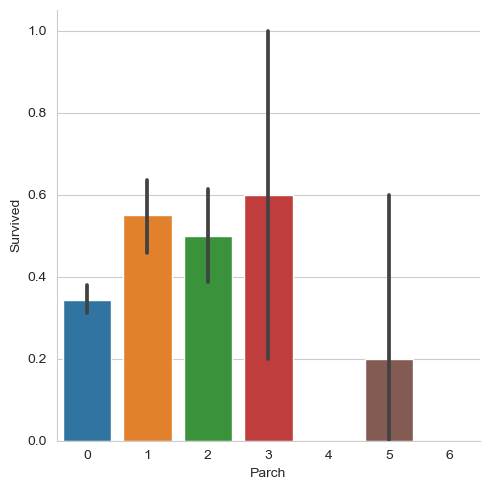

In [89]:
sns.catplot(x='Parch',y='Survived',kind='bar',data=train_data);

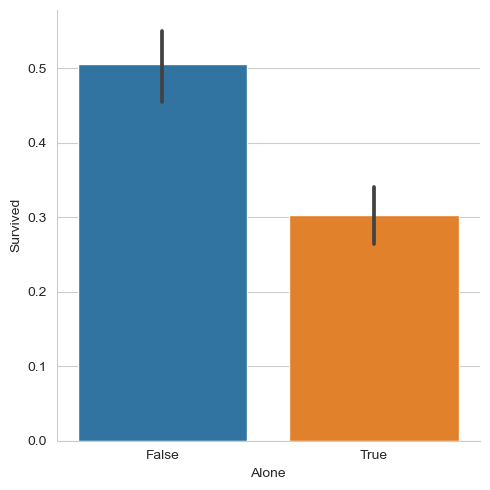

In [90]:
sns.catplot(x='Alone',y='Survived',kind='bar',data=train_data);